# ECON 494 Final Thesis
#### _Univeristy of British Columbia_
 Rina Forristal, 4th Year BIE

Loading Libraries

In [136]:
import sys
!{sys.executable} -m pip install html5lib
import unittest
from typing import Tuple, Dict
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import datetime
import re
import statsmodels.api as sm
import matplotlib.ticker as mticker


### Mortgage Level Data 

<a href="https://ffiec.cfpb.gov/data-browser/data/2018?category=states&items=CA&leis=549300KPHGEE40YQXO21" target="_blank">Source</a>


<a href="https://ffiec.cfpb.gov/documentation/publications/loan-level-datasets/lar-data-fields#derived_msa-md" target="_blank">LAR Data Fields</a>


In [75]:
mortgage_originations_2018 = pd.read_csv("Data/state_CA_2018.csv")
mortgage_originations_2019 = pd.read_csv("Data/state_CA_2019.csv")
mortgage_originations_2020 = pd.read_csv("Data/state_CA_2020.csv")
mortgage_originations_2021 = pd.read_csv("Data/state_CA_2021.csv")

# Merge datasets
mortgage_data = pd.concat(
    [mortgage_originations_2018, mortgage_originations_2019, mortgage_originations_2020, mortgage_originations_2021],
    ignore_index=True
)
mortgage_data.head()

C:\Users\Patron\AppData\Local\Temp\ipykernel_1984\3100568508.py:1: DtypeWarning: Columns (4,5,22,23,24,26,27,28,29,30,31,32,33,38,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  mortgage_originations_2018 = pd.read_csv("Data/state_CA_2018.csv")
C:\Users\Patron\AppData\Local\Temp\ipykernel_1984\3100568508.py:2: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  mortgage_originations_2019 = pd.read_csv("Data/state_CA_2019.csv")
C:\Users\Patron\AppData\Local\Temp\ipykernel_1984\3100568508.py:3: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,44,46,78,80) have mixed types. Specify dtype option on import or set low_memory=False.
  mortgage_originations_2020 = pd.read_csv("Data/state_CA_2020.csv")
C:\Users\Patron\AppData\Local\Temp\ipykernel_1984\3100568508.py:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,44,46,77,78,79,80) have mixed types.

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2018,KD3XUN7C6T14HNAYLU02,31084,CA,6037.0,6037262100.0,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3028,17.37,69300,313.0,1007,1533,55
1,2018,54930091JQKCU3Z6IP44,41884,CA,6075.0,6075026402.0,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,7.0,NaN,NaN,4407,89.18,116400,77.0,816,1218,58
2,2018,KD3XUN7C6T14HNAYLU02,31084,CA,6037.0,6037620901.0,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,2806,24.09,69300,334.0,781,1032,42
3,2018,KD3XUN7C6T14HNAYLU02,11244,CA,6059.0,6059062800.0,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3725,13.32,92700,132.0,862,2577,54
4,2018,KD3XUN7C6T14HNAYLU02,31084,CA,6037.0,6037620305.0,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5750,17.74,69300,327.0,1303,3193,54


### GSE Loan Limit Data 
https://www.fhfa.gov/data/conforming-loan-limit?redirect= 

In [117]:
GSE_2018_loan_limits=pd.read_excel("Data/FullCountyLoanLimitList2018_HERA-BASED_FINAL_FLAT.XLSX",header=1)
GSE_2018_loan_limits = GSE_2018_loan_limits.drop(["State", "CBSA Number", "Two-Unit Limit", "Three-Unit Limit", "Four-Unit Limit"], axis=1)
GSE_2018_loan_limits["County Name"] = GSE_2018_loan_limits["County Name"].str.capitalize()
GSE_2018_loan_limits["Year"] = 2018

GSE_2019_loan_limits = pd.read_excel("Data/FullCountyLoanLimitList2019_HERA-BASED_FINAL_FLAT.XLSX", header=1)
GSE_2019_loan_limits = GSE_2019_loan_limits[GSE_2019_loan_limits["State"] == "CA"]
GSE_2019_loan_limits = GSE_2019_loan_limits.drop(["State", "CBSA Number", "Two-Unit Limit", "Three-Unit Limit", "Four-Unit Limit"], axis=1)
GSE_2019_loan_limits["County Name"] = GSE_2019_loan_limits["County Name"].str.capitalize()
GSE_2019_loan_limits["Year"] = 2019

GSE_2020_loan_limits = pd.read_excel("Data/FullCountyLoanLimitList2020_HERA-BASED_FINAL_FLAT.XLSX", header=1)
GSE_2020_loan_limits = GSE_2020_loan_limits[GSE_2020_loan_limits["State"] == "CA"]
GSE_2020_loan_limits["County Name"] = GSE_2020_loan_limits["County Name"].str.capitalize()
GSE_2020_loan_limits["One-Unit Limit"]=GSE_2020_loan_limits["One-Unit\nLimit"]
GSE_2020_loan_limits = GSE_2020_loan_limits.drop(["State", "CBSA Number", "Two-Unit\nLimit", "One-Unit\nLimit","Three-Unit\nLimit", "Four-Unit\nLimit"], axis=1)
GSE_2020_loan_limits["Year"] = 2020
#
GSE_2021_loan_limits = pd.read_excel("Data/FullCountyLoanLimitList2021_HERA-BASED_FINAL_FLAT (1).xlsx", header=1)
GSE_2021_loan_limits = GSE_2021_loan_limits[GSE_2021_loan_limits["State"] == "CA"]
GSE_2021_loan_limits["County Name"] = GSE_2021_loan_limits["County Name"].str.capitalize()
GSE_2021_loan_limits["One-Unit Limit"]=GSE_2021_loan_limits["One-Unit\nLimit"]
GSE_2021_loan_limits = GSE_2021_loan_limits.drop(["State", "CBSA Number", "Two-Unit\nLimit", "One-Unit\nLimit","Three-Unit\nLimit", "Four-Unit\nLimit"], axis=1)
GSE_2021_loan_limits["Year"] = 2021


In [118]:

def remove_last_word_and_capitalize(name):
    name = re.sub(r'\s+county$', '', name, flags=re.IGNORECASE)  
    return name.title()  

GSE_2018_loan_limits["County Name"] = GSE_2018_loan_limits["County Name"].apply(remove_last_word_and_capitalize)

GSE_2019_loan_limits["County Name"] = GSE_2019_loan_limits["County Name"].apply(remove_last_word_and_capitalize)

GSE_2020_loan_limits["County Name"] = GSE_2020_loan_limits["County Name"].apply(remove_last_word_and_capitalize)

GSE_2021_loan_limits["County Name"] = GSE_2021_loan_limits["County Name"].apply(remove_last_word_and_capitalize)

GSE_loan_limits_all_years = pd.concat([GSE_2019_loan_limits, GSE_2020_loan_limits, GSE_2021_loan_limits], ignore_index=True)

In [119]:

columns = [

    "activity_year", "lei", "conforming_loan_limit", "purchaser_type", "loan_purpose",  "total_units", "loan_term",

    "county_code",  "derived_loan_product_type",  "action_taken",  "loan_type",  "lien_status",  "reverse_mortgage",

    "loan_amount", "interest_rate", "hoepa_status", "property_value", "income", "applicant_credit_score_type", 
    "initially_payable_to_institution",  "aus-1",  "aus-3",

]

mortgage_originations_2018_short = mortgage_originations_2018[columns]
mortgage_originations_2019_short = mortgage_originations_2019[columns]
mortgage_originations_2020_short = mortgage_originations_2020[columns]
mortgage_originations_2021_short = mortgage_originations_2021[columns]

single_unit_mortgage_originations_2018 = mortgage_originations_2018_short[
    mortgage_originations_2018_short["total_units"].isin([1, "1"])]

single_unit_mortgage_originations_2018 = single_unit_mortgage_originations_2018.dropna(
    subset=["county_code"]
)
single_unit_mortgage_originations_2019 = mortgage_originations_2019_short[
    mortgage_originations_2019_short["total_units"].isin([1, "1"])
]

single_unit_mortgage_originations_2019 = single_unit_mortgage_originations_2019.dropna(

    subset=["county_code"]

)

single_unit_mortgage_originations_2020 = mortgage_originations_2020_short[

    mortgage_originations_2020_short["total_units"].isin([1, "1"])

]

single_unit_mortgage_originations_2020 = single_unit_mortgage_originations_2020.dropna(

    subset=["county_code"]

)

single_unit_mortgage_originations_2021 = mortgage_originations_2021_short[

    mortgage_originations_2021_short["total_units"].isin([1, "1"])

]

single_unit_mortgage_originations_2021 = single_unit_mortgage_originations_2021.dropna(

    subset=["county_code"]

)

def clean_and_convert_county_code(df):
    df = df.copy()  # Avoid modifying the original dataframe
    df["county_code"] = pd.to_numeric(df["county_code"], errors="coerce")  # Convert to numeric, forcing errors to NaN
    df = df.dropna(subset=["county_code"])  # Drop NaN values
    df["county_code"] = df["county_code"].astype(int)  # Convert to int safely
    return df

single_unit_mortgage_originations_2018 = clean_and_convert_county_code(single_unit_mortgage_originations_2018)
single_unit_mortgage_originations_2019 = clean_and_convert_county_code(single_unit_mortgage_originations_2019)
single_unit_mortgage_originations_2020 = clean_and_convert_county_code(single_unit_mortgage_originations_2020)
single_unit_mortgage_originations_2021 = clean_and_convert_county_code(single_unit_mortgage_originations_2021)



In [120]:
def clean_and_convert_county_code(df):
    df = df.copy()  # Avoid modifying the original dataframe
    df["county_code"] = pd.to_numeric(df["county_code"], errors="coerce")  # Convert to numeric, forcing errors to NaN
    df = df.dropna(subset=["county_code"])  # Drop NaN values
    df["county_code"] = df["county_code"].astype(int)  # Convert to int safely
    return df

single_unit_mortgage_originations_2018 = clean_and_convert_county_code(single_unit_mortgage_originations_2018)
single_unit_mortgage_originations_2019 = clean_and_convert_county_code(single_unit_mortgage_originations_2019)
single_unit_mortgage_originations_2020 = clean_and_convert_county_code(single_unit_mortgage_originations_2020)
single_unit_mortgage_originations_2021 = clean_and_convert_county_code(single_unit_mortgage_originations_2021)

# Convert back to string if needed
single_unit_mortgage_originations_2018["county_code"] = single_unit_mortgage_originations_2018["county_code"].astype(str)
single_unit_mortgage_originations_2019["county_code"] = single_unit_mortgage_originations_2019["county_code"].astype(str)
single_unit_mortgage_originations_2020["county_code"] = single_unit_mortgage_originations_2020["county_code"].astype(str)
single_unit_mortgage_originations_2021["county_code"] = single_unit_mortgage_originations_2021["county_code"].astype(str)


In [121]:
# List of valid county codes as strings
valid_county_codes = [
    '6073', '6001', '6037', '6017', '6099', '6067', '6085', '6111',
    '6065', '6059', '6097', '6087', '6071', '6095', '6053', '6081',
    '6101', '6075', '6041', '6045', '6013', '6005', '6113', '6029',
    '6077', '6083', '6047', '6109', '6039', '6051', '6061', '6007',
    '6057', '6079', '6019', '6107', '6031', '6025', '6033', '6089',
    '6069', '6049', '6055', '6023', '6103', '6115', '6009', '6011',
    '6093', '6035', '6105', '6021', '6063', '6015', '6091', '6043',
    '6027', '6003'
]

def clean_and_filter_county_code(df):
    df = df.copy()  
    df["county_code"] = pd.to_numeric(df["county_code"], errors="coerce")  
    df = df.dropna(subset=["county_code"])  # Drop NaN values
    df["county_code"] = df["county_code"].astype(int).astype(str)  
    df = df[df["county_code"].isin(valid_county_codes)]  # Filter valid county codes
    return df

single_unit_mortgage_originations_2018 = clean_and_filter_county_code(single_unit_mortgage_originations_2018)
single_unit_mortgage_originations_2019 = clean_and_filter_county_code(single_unit_mortgage_originations_2019)

single_unit_mortgage_originations_2020 = clean_and_convert_county_code(single_unit_mortgage_originations_2020)
single_unit_mortgage_originations_2021 = clean_and_convert_county_code(single_unit_mortgage_originations_2021)


In [122]:

county_data = [
    (6001, 'Alameda'), (6003, 'Alpine'), (6005, 'Amador'),
    (6007, 'Butte'), (6009, 'Calaveras'), (6011, 'Colusa'),
    (6013, 'Contra Costa'), (6015, 'Del Norte'), (6017, 'El Dorado'),
    (6019, 'Fresno'), (6021, 'Glenn'), (6023, 'Humboldt'),
    (6025, 'Imperial'), (6027, 'Inyo'), (6029, 'Kern'),
    (6031, 'Kings'), (6033, 'Lake'), (6035, 'Lassen'),
    (6037, 'Los Angeles'), (6039, 'Madera'), (6041, 'Marin'),
    (6043, 'Mariposa'), (6045, 'Mendocino'), (6047, 'Merced'),
    (6049, 'Modoc'), (6051, 'Mono'), (6053, 'Monterey'),
    (6055, 'Napa'), (6057, 'Nevada'), (6059, 'Orange'),
    (6061, 'Placer'), (6063, 'Plumas'), (6065, 'Riverside'),
    (6067, 'Sacramento'), (6069, 'San Benito'), (6071, 'San Bernardino'),
    (6073, 'San Diego'), (6075, 'San Francisco'), (6077, 'San Joaquin'),
    (6079, 'San Luis Obispo'), (6081, 'San Mateo'), (6083, 'Santa Barbara'),
    (6085, 'Santa Clara'), (6087, 'Santa Cruz'), (6089, 'Shasta'),
    (6091, 'Sierra'), (6093, 'Siskiyou'), (6095, 'Solano'),
    (6097, 'Sonoma'), (6099, 'Stanislaus'), (6101, 'Sutter'),
    (6103, 'Tehama'), (6105, 'Trinity'), (6107, 'Tulare'),
    (6109, 'Tuolumne'), (6111, 'Ventura'), (6113, 'Yolo'),
    (6115, 'Yuba')
]
df_counties = pd.DataFrame(county_data, columns=['FIPS County Code', 'County Name'])


In [123]:
GSE_loan_limits_all_years = pd.merge(GSE_loan_limits_all_years, df_counties[['County Name', 'FIPS County Code']], 
                     on='County Name', how='left', suffixes=('', '_new'))
GSE_loan_limits_all_years.drop(columns=['FIPS County Code'], inplace=True)
GSE_loan_limits_all_years.rename(columns={'FIPS County Code_new': 'County Code'}, inplace=True)

In [139]:
def regression_discontinuity_test(df, county_CCL, county_name_map):
    results = []
    for county in df["county_code"].unique():
        try:
            conforming_limit = county_CCL.loc[
                county_CCL["County Code"] == county, "One-Unit Limit"
            ].values[0]
        except IndexError:
            continue  

        county_name = county_name_map.get(county, "Unknown County")

        county_sample = df[df["county_code"] == county].copy()
        county_sample.loc[:, "running_variable"] = county_sample["loan_amount"] - conforming_limit
        bandwidth = 0.1 * conforming_limit
        local_sample = county_sample[
            (county_sample["running_variable"] >= -bandwidth) & 
            (county_sample["running_variable"] <= bandwidth)
        ].copy()
        if local_sample.empty:
            continue 
        local_sample.loc[:, "approved"] = (local_sample["action_taken"] == 3).astype(int)
        X = local_sample[["running_variable"]]
        X = sm.add_constant(X)  
        y = local_sample["approved"]
        model = sm.OLS(y, X).fit()

        # Extract results
        p_value = model.pvalues["running_variable"]
        significant = "Yes" if p_value < 0.05 else "No"
        results.append({
            "County Code": county,
            "County Name": county_name,
            "Conforming Loan Limit": conforming_limit,
            "P-value": round(p_value, 3),
            "Significant at 5%": significant,
        })


    results_df = pd.DataFrame(results)

    if not results_df.empty and "Significant at 5%" in results_df.columns:
        results_df["Significant at 5%"] = pd.Categorical(
            results_df["Significant at 5%"], categories=["Yes", "No"], ordered=True
        )

    if "Significant at 5%" in results_df.columns:
        return results_df.sort_values(by="Significant at 5%")
    else:
        return results_df
    
mortgage_datasets = {
2018: single_unit_mortgage_originations_2018,
2019: single_unit_mortgage_originations_2019,
2020: single_unit_mortgage_originations_2020,
2021: single_unit_mortgage_originations_2021}

GSE_loan_limits_all_years["County Code"] = GSE_loan_limits_all_years["County Code"].astype(int)
results_by_year = {}
for year, df in mortgage_datasets.items():
    print(f"Running RD test for {year}...")
    df = df.copy()
    df["county_code"] = df["county_code"].astype(int)
    county_CCL = GSE_loan_limits_all_years[GSE_loan_limits_all_years["Year"] == year]
    county_name_map = dict(zip(county_CCL["County Code"], county_CCL["County Name"]))
    results_by_year[year] = regression_discontinuity_test(df, county_CCL, county_name_map)
final_results_df = pd.concat(results_by_year, names=["Year"]).reset_index()


Running RD test for 2018...
Running RD test for 2019...
Running RD test for 2020...
Running RD test for 2021...


In [140]:
final_results_df.head()

,Year,level_1,County Code,County Name,Conforming Loan Limit,P-value,Significant at 5%
0,2019,0,6071.0,San Bernardino,484350.0,0.000,Yes
1,2019,52,6011.0,Colusa,484350.0,0.003,Yes
2,2019,44,6007.0,Butte,484350.0,0.024,Yes
3,2019,43,6015.0,Del Norte,484350.0,0.047,Yes
4,2019,36,6031.0,Kings,484350.0,0.028,Yes


array([484350., 494500., 726525., 667000., 690000., 552000., 704950.,
       713000., 625500., 529000., 652050., 486450., 765600., 764750.,
       672750., 569250., 510400., 701500., 598000., 548250., 753250.,
       822375., 707250., 739450., 816500., 550850., 660100.])

In [141]:
result = final_results_df.groupby('Year')['Significant at 5%'].value_counts().unstack(fill_value=0)
result

Significant at 5%,Yes,No
Year,,
2019,19,39
2020,13,45
2021,8,49


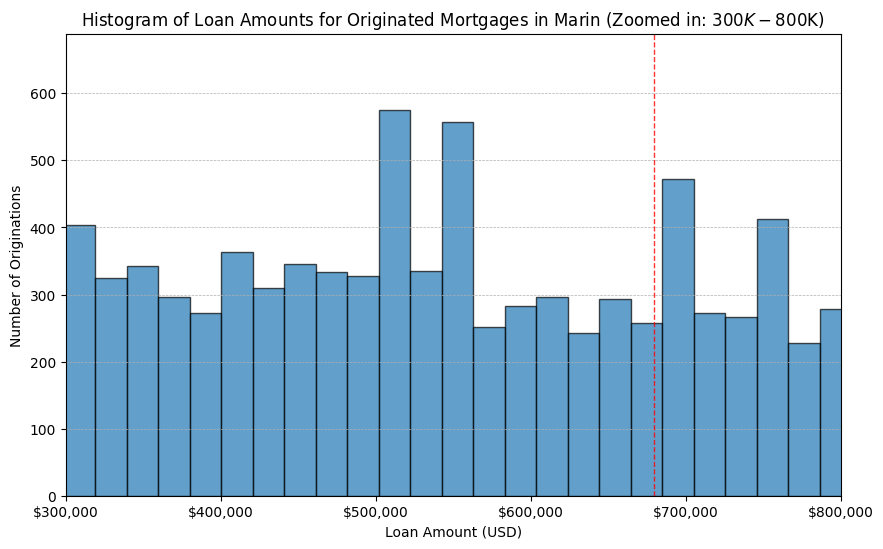

In [138]:
# Ensure county_name is an integer
county_name = 6041  # FIPS code (as an integer)
county_name_str = county_name_map.get(county_name, "County not found")

# Filter DataFrame based on county code
filtered_df = df[df["county_code"] == county_name]

# Filter originated loans
originated_loans = filtered_df[filtered_df["action_taken"] == 1]

# Loan amounts
loan_amounts = originated_loans["loan_amount"]

# Remove outliers (percentile filter)
lower_bound = np.percentile(loan_amounts, 1)
upper_bound = np.percentile(loan_amounts, 99)
filtered_loan_amounts = loan_amounts[(loan_amounts >= lower_bound) & (loan_amounts <= upper_bound)]

# Define bins for the histogram
bins = 150

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_loan_amounts, bins=bins, edgecolor="black", alpha=0.7)

# Access GSE limits based on county name
county_gse_limits = GSE_2018_loan_limits[GSE_2018_loan_limits["County Name"] == county_name_map.get(county_name)]["One-Unit Limit"].unique()

# Plot vertical lines for county-specific GSE loan limits
for limit in county_gse_limits:
    plt.axvline(limit, color="red", linestyle="dashed", linewidth=1, alpha=0.8)

# Format x-axis as currency
def currency_format(x, _):
    return f"${x:,.0f}"  

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

# Set zoomed-in x-axis limits
plt.xlim(300000, 800000)

# Labels and title
plt.xlabel("Loan Amount (USD)")
plt.ylabel("Number of Originations")
plt.title(f"Histogram of Loan Amounts for Originated Mortgages in {county_name_str} (Zoomed in: $300K - $800K)")

# Add grid for better readability
plt.grid(axis="y", linestyle="--", linewidth=0.5)

plt.show()


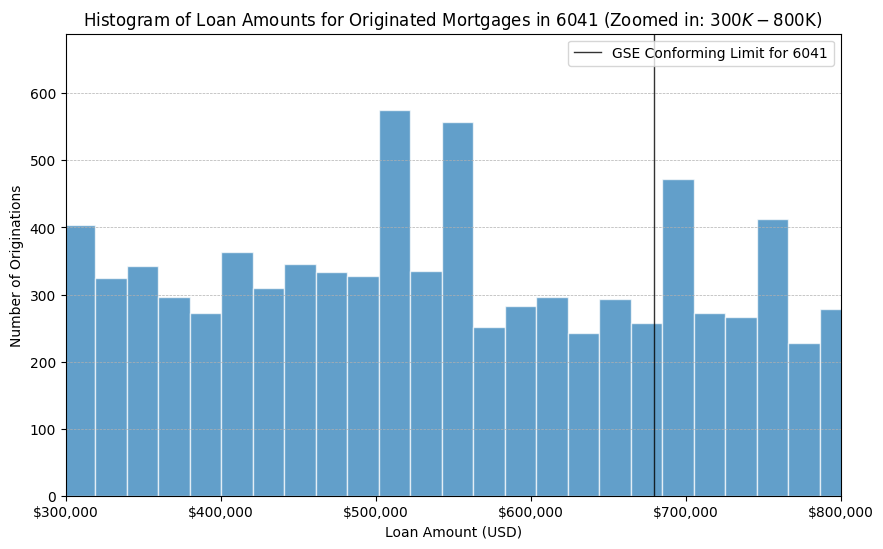

In [137]:
plt.figure(figsize=(10, 6))

# Histogram with dark blue color
plt.hist(filtered_loan_amounts, bins=bins, edgecolor="white", alpha=0.7, color="#1f77b4")

# Add vertical lines for GSE loan limits with a label
for limit in county_gse_limits:
    plt.axvline(limit, color="black", linestyle="solid", linewidth=1, alpha=0.8, 
                label=f"GSE Conforming Limit for {county_name}")

# Ensure the label appears only once in the legend
plt.legend(loc="upper right")

# Format x-axis as currency
def currency_format(x, _):
    return f"${x:,.0f}"

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

# Set zoomed-in x-axis limits
plt.xlim(300000, 800000)

# Labels and title
plt.xlabel("Loan Amount (USD)")
plt.ylabel("Number of Originations")
plt.title(f"Histogram of Loan Amounts for Originated Mortgages in {county_name} (Zoomed in: $300K - $800K)")

# Add grid for better readability
plt.grid(axis="y", linestyle="--", linewidth=0.5)

plt.show()
